# Logistic regression from scratch
## author: Dr. Reynier Cruz Torres

Below, we implement a logistic regression classification algorithm in python from scratch, using batch gradient descent. We begin by creating the dataset which corresponds to a linearly separable set of two blobs. Our data will have two features so that we can visualize later on the classification decision boundary.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import cm

Text(0, 0.5, 'x2')

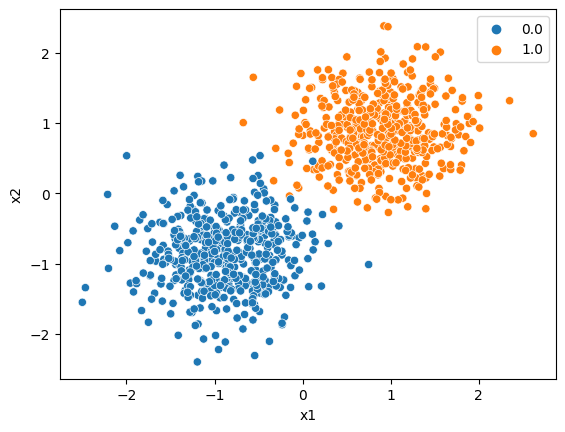

In [2]:
# Load or, in this case, generate the data
X1 = np.random.randn(500,2)+1.8
X2 = np.random.randn(500,2)-1.8
y1 = np.ones(500)
y2 = np.zeros(500)
X = np.concatenate((X1,X2))
y = np.concatenate((y1,y2))

# Scale the data
X = X/np.std(X)

# Visualize the data
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.xlabel('x1')
plt.ylabel('x2')

Binary crossentropy loss function:

### $L = - \sum \Big( y_{\rm true} \ln(y_{\rm pred})+(1-y_{\rm true}) \ln(1-\ln(y_{\rm pred}) \Big)$

where

### $y_{\rm pred} = S(X \cdot w + b)$

and where

### $S(z) = \frac{1}{1+e^{-z}}$

In [3]:
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Loss function
def binary_cross_entropy_cost_function(y_pred, y_true):
    return -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

# Learning rate (very small so that we see the evolution of the model)
learning_rate = 0.0001

# Initialize the model parameters
num_features = X.shape[1]
w = np.random.randn(num_features)
b = np.random.randn()

What we need is to tweak the weights and biases in a way that reduces the loss function. Gradient descent tells us how to do that. We need to subtract the gradient of the loss function (multiplied by the learning rate) at each point:

### $w \leftarrow w - \nabla_{w} L$

### $b \leftarrow b - \nabla_{b} L$

For our specific loss function (binary crossentropy) the gradient with respect to weights and biases corresponds to:

### $\frac{\partial L}{\partial z} = \frac{\partial L}{\partial y_{\rm pred}} \frac{\partial y_{\rm pred}}{\partial z}$

### $\frac{\partial L}{\partial y_{\rm pred}} = - \sum \Big(\frac{y_{\rm true}}{y_{\rm pred}}-\frac{1-y_{\rm true}}{1-y_{\rm pred}}\Big) = -\sum \frac{y_{\rm true}-y_{\rm pred}}{y_{\rm pred}(1-y_{\rm pred})}$

### $\frac{\partial y_{\rm pred}}{\partial z} = y_{\rm pred}^2 e^{-z}$

### $\frac{\partial L}{\partial w} = (y_{\rm true}-y_{\rm pred})\cdot X$

### $\frac{\partial L}{\partial b} = (y_{\rm true}-y_{\rm pred})$

In [4]:
saved_w, saved_b = [], []
saved_cost, saved_iter = [], []

# train the model
num_iterations = 1000
for i in range(num_iterations):
    
    # compute the predictions
    z = X.dot(w)+b
    y_pred = sigmoid(z)
    
    # Determine the gradient of the loss function
    gw = (y_pred+b-y).dot(X)
    gb = np.sum(y_pred-y)
        
    # update the model parameters
    w -= learning_rate * gw
    b -= learning_rate * gb
    
    # Calculate the loss function just to see later on how it gets minimized
    cost = binary_cross_entropy_cost_function(y_pred,y)
    
    # Save values to see the progression of the training
    saved_cost.append(cost)
    saved_iter.append(i)
    saved_w.append([w[0],w[1]])
    saved_b.append(b)

Our architecture will classify a given instance as belonging to class 1 if 

### $S(z)=\frac{1}{1+e^{-z}} \ge 0.5$ 

and 0 if 

### $S(z)=\frac{1}{1+e^{-z}} < 0.5$

Therefore, the decision boundary happens when $S(z)=0.5$. This corresponds to:

### $\frac{1}{1+e^{-z}}=\frac{1}{2} \rightarrow e^{-z} = 1 \rightarrow z = 0$

Since we have two features, given a value of $x_1$, we can find the corresponding value of $x_2$ using: 

### $z = w\cdot X + b = w_1x_1+w_2x_2+b=0 \rightarrow x_2 = -\frac{w_1x_1+b}{w_2}$.

In [5]:
x_fits=[-3,3]
y_fits = []

for i in range(len(saved_w)):
    y_fits.append([-(x_fits[0]*saved_w[i][0]+saved_b[i])/saved_w[i][1],
                   -(x_fits[1]*saved_w[i][0]+saved_b[i])/saved_w[i][1]])

Finally, we can plot our data along with the evolution of the decision boundary with training and the loss function.

Text(0.5, 0.7, 'batch gradient descent')

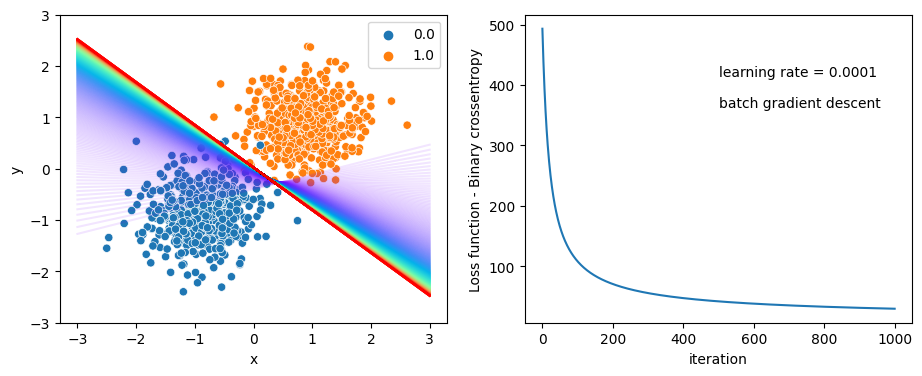

In [6]:
# Create two subplots
fig, ax = plt.subplots(ncols=2,figsize=(11,4))

# Plot the data
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,ax=ax[0])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# Create a continuous color map to show the evolution of the decision boundary
color = cm.rainbow(np.linspace(0, 1, len(saved_w)))

for i in range(len(saved_w)):
    ax[0].plot(x_fits,y_fits[i],color=color[i],alpha=0.1)
    
ax[0].set_ylim(-3,3)

ax[1].plot(saved_iter,saved_cost)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('Loss function - Binary crossentropy')
ax[1].text(0.5,0.8,'learning rate = {}'.format(learning_rate),transform=ax[1].transAxes)
ax[1].text(0.5,0.7,'batch gradient descent',transform=ax[1].transAxes)